In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
data = pd.read_csv('Liver_disease_data.csv')

In [ ]:
data.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

,0
Age,0
Gender,0
BMI,0
AlcoholConsumption,0
Smoking,0
GeneticRisk,0
PhysicalActivity,0
Diabetes,0
Hypertension,0
LiverFunctionTest,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1700 non-null   int64  
 1   Gender              1700 non-null   int64  
 2   BMI                 1700 non-null   float64
 3   AlcoholConsumption  1700 non-null   float64
 4   Smoking             1700 non-null   int64  
 5   GeneticRisk         1700 non-null   int64  
 6   PhysicalActivity    1700 non-null   float64
 7   Diabetes            1700 non-null   int64  
 8   Hypertension        1700 non-null   int64  
 9   LiverFunctionTest   1700 non-null   float64
 10  Diagnosis           1700 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 146.2 KB


<Axes: >

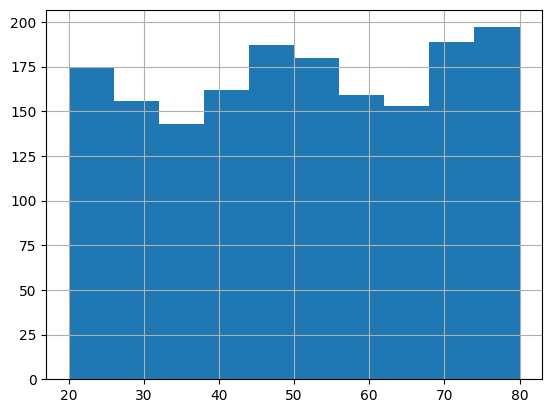

In [ ]:
data["Age"].hist()

In [ ]:
data["Diagnosis"].value_counts()

,count
Diagnosis,
1,936
0,764


In [ ]:
result = pd.crosstab(data['Diagnosis'], data['Gender'])
print(result)

Gender       0    1
Diagnosis          
0          459  305
1          384  552


In [ ]:
men = data.loc[data.Gender == 1]["Diagnosis"]
rate_men = sum(men)/len(men)

print("% of men who had diagnosed:", rate_men)

% of men who had diagnosed: 0.6441073512252042


In [ ]:
women = data.loc[data.Gender == 0]["Diagnosis"]
rate_women = sum(women)/len(women)

print("% of women who had diagnosed:", rate_women)

% of women who had diagnosed: 0.4555160142348754


In [ ]:
smoke = data.loc[data.Smoking == 1]["Diagnosis"]
rate_smoke = sum(smoke)/len(smoke)

print("% of smokers who had diagnosed:", rate_smoke)


% of smokers who had diagnosed: 0.7056451612903226


In [ ]:
nonsmoke = data.loc[data.Smoking == 0]["Diagnosis"]
rate_nonsmoke = sum(nonsmoke)/len(nonsmoke)

print("% of non-smokers who had diagnosed:", rate_nonsmoke)

% of non-smokers who had diagnosed: 0.4867109634551495


In [ ]:
result = pd.crosstab(data['Diagnosis'], data['Hypertension'])
print(result)

Hypertension    0    1
Diagnosis             
0             698   66
1             739  197


In [ ]:
Hypertension = data.loc[data.Hypertension == 1]["Diagnosis"]
rate_Hypertension = sum(Hypertension)/len(Hypertension)

print("% of Hypertension who had diagnosed:", rate_Hypertension)

% of Hypertension who had diagnosed: 0.7490494296577946


In [ ]:
noHypertension = data.loc[data.Hypertension == 0]["Diagnosis"]
rate_noHypertension = sum(noHypertension)/len(noHypertension)

print("% of non-Hypertension who had diagnosed:", rate_noHypertension)

% of non-Hypertension who had diagnosed: 0.5142658315935977


In [ ]:
# shuffle data
data = data.sample(frac=1)
data = data.reset_index(drop=True)  # reset index after shuffling

In [ ]:
data.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,29,0,18.050762,3.890701,0,1,9.852700,0,0,60.174491,0
1,69,0,31.801401,6.517627,0,1,2.052719,0,0,91.068110,0
2,51,0,15.550879,18.095327,0,0,2.924418,0,0,69.575668,1
3,76,0,25.879510,13.030314,0,0,3.195215,0,0,60.581828,1
4,76,1,37.555910,6.655617,0,0,9.544015,1,0,59.335023,1


In [ ]:
X = data.drop('Diagnosis', axis=1) 
Y = data['Diagnosis']

In [ ]:
X.shape, Y.shape

((1700, 10), (1700,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
!pip install bayesian-optimization

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from bayes_opt import BayesianOptimization
import joblib
import time
import os

class MetaLearnerPredictor:
    def __init__(self, model_dir='saved_model'):
        """
        Load the saved model, scaler, and mappings
        """
        self.model = tf.keras.models.load_model(os.path.join(model_dir, 'meta_learner_model.keras'))
        self.feature_scaler = joblib.load(os.path.join(model_dir, 'feature_scaler.pkl'))

        # Load the mappings
        mappings = joblib.load(os.path.join(model_dir, 'feature_mappings.pkl'))
        self.max_features_mapping = mappings['max_features_mapping']
        self.inverse_max_features_mapping = mappings['inverse_max_features_mapping']

    def predict_accuracy(self, dataset_features, hyperparams):
        """
        Predict accuracy for given dataset features and hyperparameters
        """
        # Scale dataset features
        dataset_scaled = self.feature_scaler.transform(dataset_features)

        # Convert max_features to numerical value
        if isinstance(hyperparams['max_features'], str):
            max_features_encoded = self.max_features_mapping.get(hyperparams['max_features'], 1)  # default to 'sqrt'
        else:
            max_features_encoded = hyperparams['max_features']

        # Combine features
        X = np.hstack([
            dataset_scaled,
            np.array([[
                hyperparams['n_estimators'],
                hyperparams['max_depth'],
                max_features_encoded,
                hyperparams['min_samples_split']
            ]])
        ])

        return self.model.predict(X)[0][0]

def find_best_hyperparameters(meta_learner, dataset_features, param_grid):
    """
    Find best hyperparameters using meta-learner
    """
    start_time = time.time()
    best_accuracy = 0
    best_params = None

    # Try all combinations from param_grid
    for n_est in param_grid['n_estimators']:
        for depth in param_grid['max_depth']:
            for feat in param_grid['max_features']:
                for min_split in param_grid['min_samples_split']:
                    params = {
                        'n_estimators': n_est,
                        'max_depth': depth,
                        'max_features': feat,
                        'min_samples_split': min_split
                    }

                    pred_accuracy = meta_learner.predict_accuracy(dataset_features, params)

                    if pred_accuracy > best_accuracy:
                        best_accuracy = pred_accuracy
                        best_params = params

    # Convert max_features back to string if it's in the mapping
    if isinstance(best_params['max_features'], (int, float)):
        if best_params['max_features'] in meta_learner.inverse_max_features_mapping:
            best_params['max_features'] = meta_learner.inverse_max_features_mapping[round(best_params['max_features'])]

    time_taken = time.time() - start_time

    return best_params, best_accuracy, time_taken

def compare_methods(dataset_features, param_grid, X_train, y_train):
    """
    Compare meta-learner with traditional methods
    Returns time taken and best parameters for each method
    """
    results = {}

    # 1. Grid Search
    start_time = time.time()
    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        cv=3,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    grid_time = time.time() - start_time

    results['grid_search'] = {
        'time': grid_time,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }

    # 2. Bayesian Optimization
    def bo_objective(n_estimators, max_depth, min_samples_split):
        clf = RandomForestClassifier(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            max_features='sqrt',  # Fixed to 'sqrt' for simplicity
            min_samples_split=int(min_samples_split),
            random_state=42
        )
        clf.fit(X_train, y_train)
        return clf.score(X_train, y_train)

    start_time = time.time()
    pbounds = {
        'n_estimators': (param_grid['n_estimators'][0], param_grid['n_estimators'][-1]),
        'max_depth': (param_grid['max_depth'][0], param_grid['max_depth'][-1]),
        'min_samples_split': (param_grid['min_samples_split'][0], param_grid['min_samples_split'][-1])
    }

    bo = BayesianOptimization(
        f=bo_objective,
        pbounds=pbounds,
        random_state=42
    )

    bo.maximize(init_points=5, n_iter=10)
    bo_time = time.time() - start_time

    results['bayesian_opt'] = {
        'time': bo_time,
        'best_params': {
            'n_estimators': int(bo.max['params']['n_estimators']),
            'max_depth': int(bo.max['params']['max_depth']),
            'max_features': 'sqrt',
            'min_samples_split': int(bo.max['params']['min_samples_split'])
        },
        'best_score': bo.max['target']
    }

    # 3. Meta-Learner
    meta_learner = MetaLearnerPredictor()
    best_params, best_accuracy, meta_time = find_best_hyperparameters(
        meta_learner, dataset_features, param_grid
    )

    results['meta_learner'] = {
        'time': meta_time,
        'best_params': best_params,
        'best_score': best_accuracy
    }

    return results

In [ ]:

X = data.drop('Diagnosis', axis=1) 
Y = data['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# User input for dataset characteristics
num_features = X_train.shape[1]  # Total number of features
num_samples = X_train.shape[0]   # Number of samples

# User inputs 
class_imbalance_ratio = 1.2251
num_classes = 2
num_categorical_features = 5
num_numerical_features = 5

# Create dataset features array
dataset_features = np.array([[
    num_features,
    num_samples,
    class_imbalance_ratio,
    num_classes,
    num_categorical_features,
    num_numerical_features
]])

# Define parameter grid
param_grid = {
    'n_estimators': [25, 50, 75, 100, 150],
    'max_depth': [3, 5, 7, 10, 50],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10]
}

# Compare methods
results = compare_methods(dataset_features, param_grid, X_train, Y_train)

# Print results
for method, result in results.items():
    print(f"\n{method}:")
    print(f"Time taken: {result['time']:.2f} seconds")
    print("Best parameters:", result['best_params'])
    print(f"Best score: {result['best_score']:.4f}")

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
| 1         | 0.9749    | 20.6      | 9.606     | 116.5     |
| 2         | 0.9992    | 31.14     | 3.248     | 44.5      |
| 3         | 0.9224    | 5.73      | 8.929     | 100.1     |
| 4         | 1.0       | 36.28     | 2.165     | 146.2     |
| 5         | 0.9992    | 42.12     | 3.699     | 47.73     |
| 6         | 0.9843    | 49.81     | 6.764     | 123.2     |
| 7         | 1.0       | 36.0      | 3.24      | 145.3     |
| 8         | 0.9733    | 48.36     | 9.988     | 25.21     |
| 9         | 0.9467    | 6.257     | 3.561     | 149.9     |
| 10        | 0.989     | 49.59     | 5.038     | 73.42     |
| 11        | 0.858     | 3.306     | 3.147     | 27.11     |
| 12        | 0.9765    | 27.68     | 9.504     | 64.48     |
| 13        | 0.9765    | 49.57     | 9.882     | 149.4     |
| 14        | 1.0       | 49.76     | 2.207     | 96.33     |
| 15    

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def validate_rf_params(X_train, Y_train, params, name=""):
    """
    Train a Random Forest with given parameters and return the accuracy
    """
    # Create and train the model
    rf = RandomForestClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        max_features=params['max_features'],
        min_samples_split=params['min_samples_split'],
        random_state=42  # for reproducibility
    )

    # Fit and predict
    rf.fit(X_train, Y_train)
    y_pred = rf.predict(X_train)

    # Calculate accuracy
    acc = accuracy_score(Y_train, y_pred)

    print(f"\n{name} Parameters:")
    print(f"Parameters used: {params}")
    print(f"Actual Training Accuracy: {acc:.4f}")

    return acc

# Parameters from the output
grid_search_params = {
    'n_estimators': 150,
    'max_depth': 50,
    'max_features': 'sqrt',
    'min_samples_split': 10
}

bayesian_opt_params = {
    'n_estimators': 146,
    'max_depth': 36,
    'max_features': 'sqrt',
    'min_samples_split': 2
}

meta_learner_params = {
    'n_estimators': 50,
    'max_depth': 50,
    'max_features': 'sqrt',
    'min_samples_split': 5
}

# Validate all three parameter combinations
grid_acc = validate_rf_params(X_train, Y_train, grid_search_params, "Grid Search")
bayesian_acc = validate_rf_params(X_train, Y_train, bayesian_opt_params, "Bayesian Optimization")
meta_acc = validate_rf_params(X_train, Y_train, meta_learner_params, "Meta-learner")


Grid Search Parameters:
Parameters used: {'n_estimators': 150, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 10}
Actual Training Accuracy: 0.9749

Bayesian Optimization Parameters:
Parameters used: {'n_estimators': 146, 'max_depth': 36, 'max_features': 'sqrt', 'min_samples_split': 2}
Actual Training Accuracy: 1.0000

Meta-learner Parameters:
Parameters used: {'n_estimators': 50, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 5}
Actual Training Accuracy: 0.9875
